<h1> <i> <b> Super Market Data Analysis. </i> </b> </h1>

<h3>A supermarket is self-service shop offering a wide variety of food, beverages and household products, organized into sections. It is larger and has a wider selection than earlier grocery stores, but is smaller and more limited in the range of merchandise than a hypermarket or big-box market.<br></br>

<img src = "https://www.bereketinvestment.com/images/111X1250X600X1/1.1939257985995600424afa.jpg">

<h3> Here I have used different techniques to viaualize the data set of supermarket.<br>
What will you discover from this analysis?<p></h3>
1.Relation of customers with SuperMarket<br>
2.Payment methods used in supermarket.<br>
3.Products relation with quantities.<br>
4.Types of product and their sales.<br>
5.Products and their ratings.<br>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


<h3> Loading dataset with computation time.</h3>

In [2]:
%time data=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
print(data.shape)

CPU times: user 8.66 ms, sys: 4.19 ms, total: 12.9 ms
Wall time: 25.4 ms
(1000, 17)


In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<h3> Data Cleaning</h3>

In [4]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no missing value and the data set is clean so we will continue with data visualization.

<h3> Checking information of data set.</h3>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<h3> Checking number of rows and columns</h3>

In [7]:
print("Dataset contains {} row and {} colums".format(data.shape[0],data.shape[1]))

Dataset contains 1000 row and 17 colums


<h3> Visualization</h3>

<img src = "https://media.mehrnews.com/d/2019/07/31/4/3194094.jpg" >

<h3><i> Now we use different visualization tools to check different aspects of Supermarket sales.</i> </h3>

<h3> Let's start with gender count</h3>

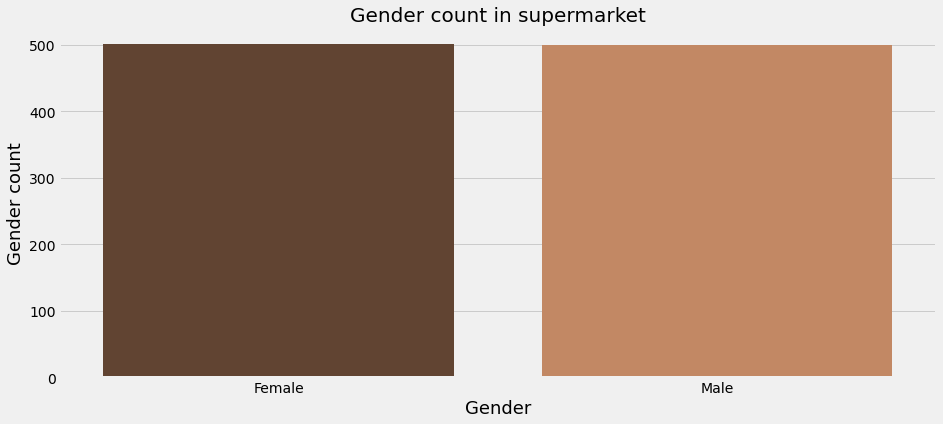

In [8]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=data , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

Here we can see that the number of males and females entering the store is almost equal. But the visulaization looks suspicious. Let's check numeric data. 

In [9]:
data.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


The visualization looks good. Let's carry on.

<h3> Customer type</h3>

Text(0, 0.5, 'Customer Count')

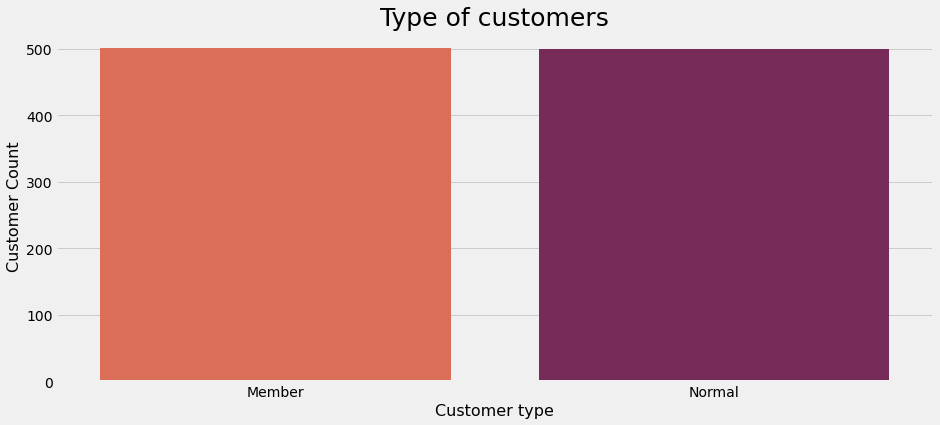

In [10]:
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "Customer type", data = data, palette = "rocket_r")
ax.set_title("Type of customers", fontsize = 25)
ax.set_xlabel("Customer type", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)


The visualization looks suspicious let's check numeric data.


In [11]:
data.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<b>Seems about right

<h3> Above we can see the type of customer in all branch combined now let's check for different branch.</h3>

Text(0, 0.5, 'Customer Count')

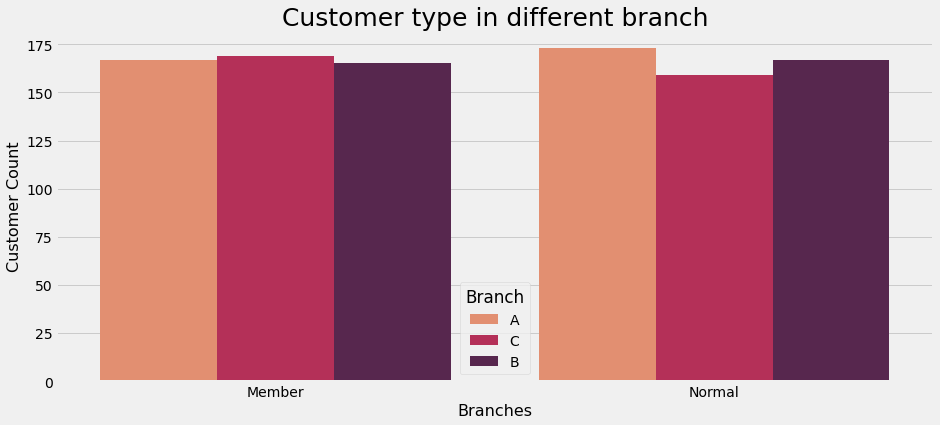

In [12]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x = "Customer type", hue = "Branch", data = data, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

<h3> Checking the different payment methods used.</h3>

Text(0, 0.5, ' Customer Count')

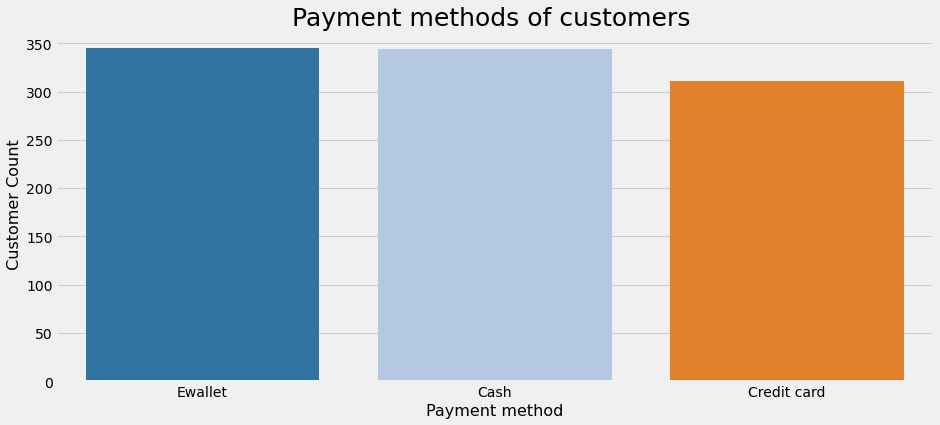

In [13]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x = "Payment", data = data, palette = "tab20")
ax.set_title(label = "Payment methods of customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)


<h3> Payment method distribution in all branches</h3>

Text(0, 0.5, 'Peple Count')

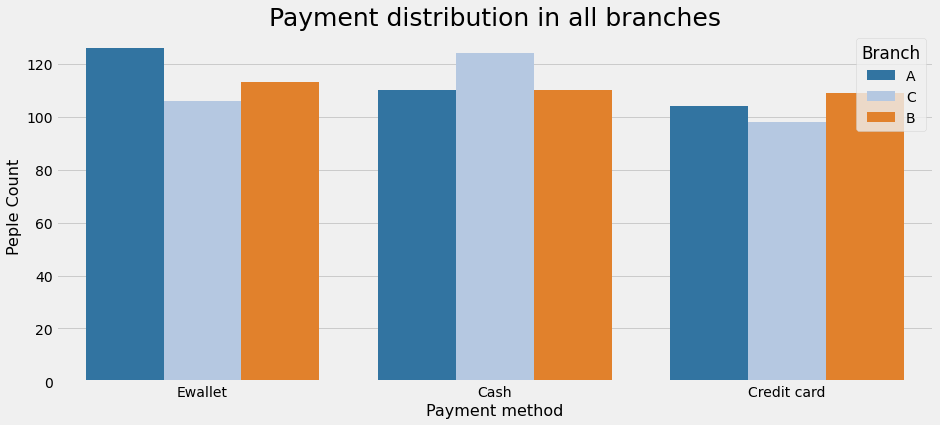

In [14]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x="Payment", hue = "Branch", data = data, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

<h3>Now let's see the rating distribution in 3 branches</h3>

Text(0, 0.5, 'Rating distribution')

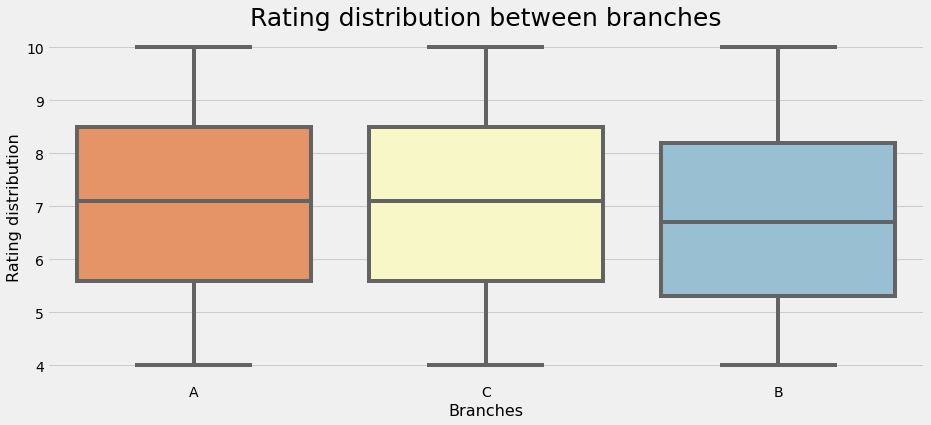

In [15]:
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =data, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)


We can see that the average rating of branch A and C is more than seven and branch B is less than 7.


<h3> Max sells time<h3>

In [16]:
data["Time"]= pd.to_datetime(data["Time"])

In [17]:
data["Hour"]= (data["Time"]).dt.hour

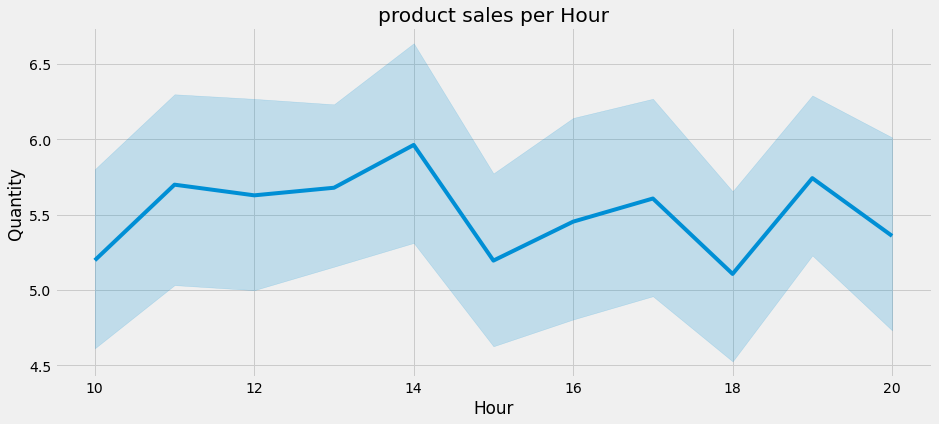

In [18]:
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = data).set_title("product sales per Hour")

We can see that the supermarket makes most of it's sells in 14:00 hrs local time.

<h3> Rating vs sales</h3>

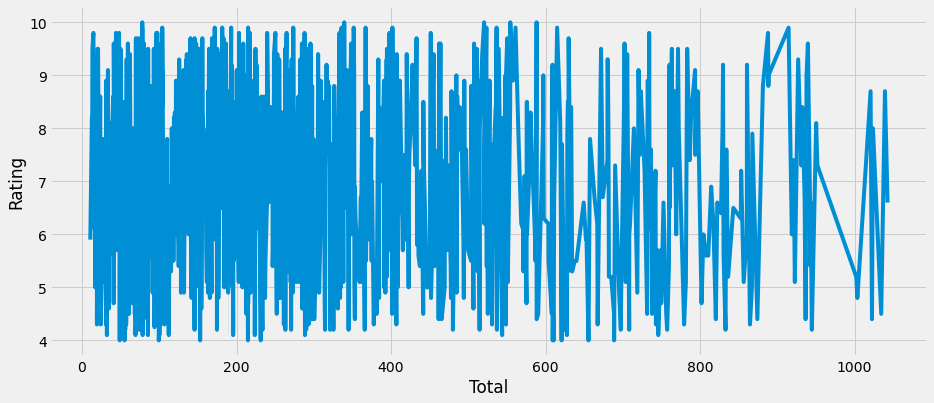

In [19]:
plt.figure(figsize=(14,6)) 
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=data)

<h3> Using boxen plot</h3>

Text(0, 0.5, 'Product Line')

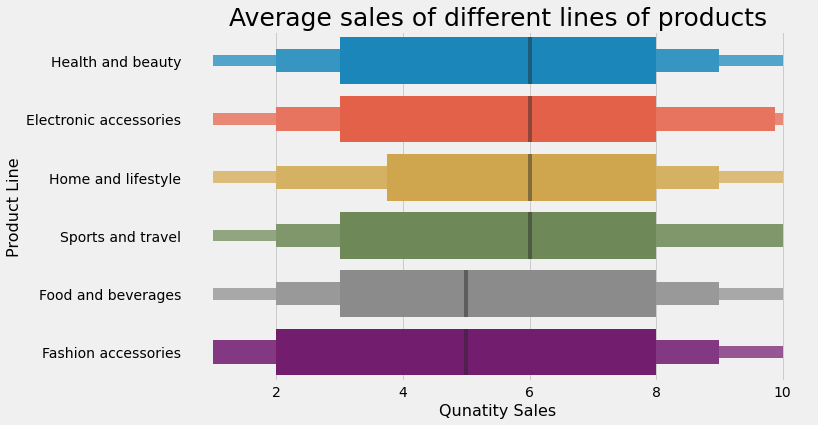

In [20]:
plt.figure(figsize=(10,6)) 
ax = sns.boxenplot(x = "Quantity", y = "Product line", data = data,)
ax.set_title(label = "Average sales of different lines of products", fontsize = 25)
ax.set_xlabel(xlabel = "Qunatity Sales",fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)

Here we can see that the average sales of different lines of products. Health and beauty making the highest sales whereas Fashon accessories making the lowest sales.

<h3> Let's see the sales count of these products.</h3> 

Text(0, 0.5, 'Product Line')

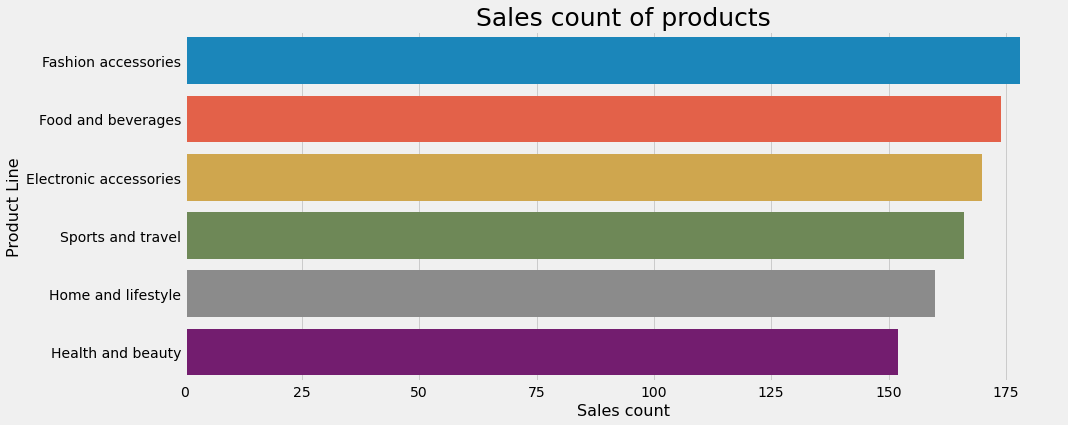

In [21]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', data=data, order = data['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

We can see the top sold products form the above figure.

<h3> Total sales of product using boxenplot</h3> 

Text(0, 0.5, 'Product Line')

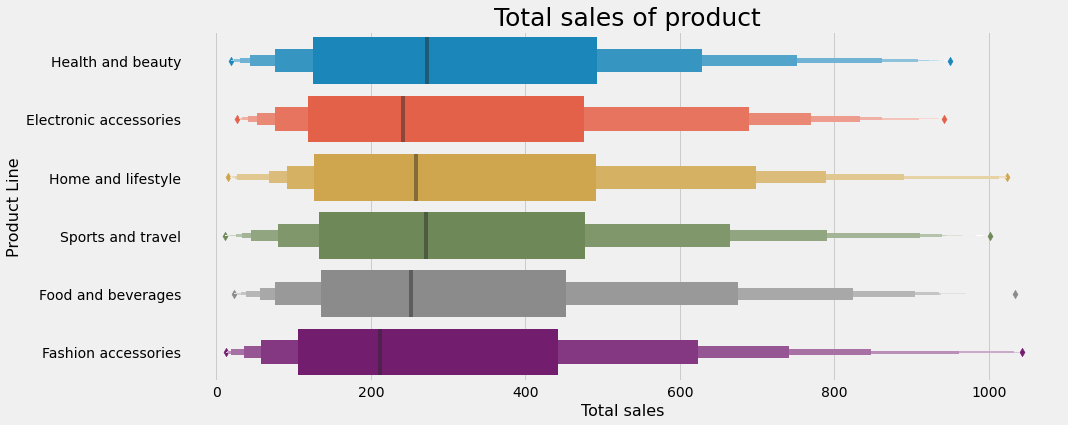

In [22]:
plt.figure(figsize=(14,6))
ax = sns.boxenplot(y= "Product line", x= "Total", data = data)
ax.set_title(label = " Total sales of product", fontsize = 25)
ax.set_xlabel(xlabel = "Total sales", fontsize = 16)
ax.set_ylabel(ylabel = "Product Line", fontsize = 16)


<h3> Now let's see average ratings of products.</h3>

Text(0, 0.5, 'Product line')

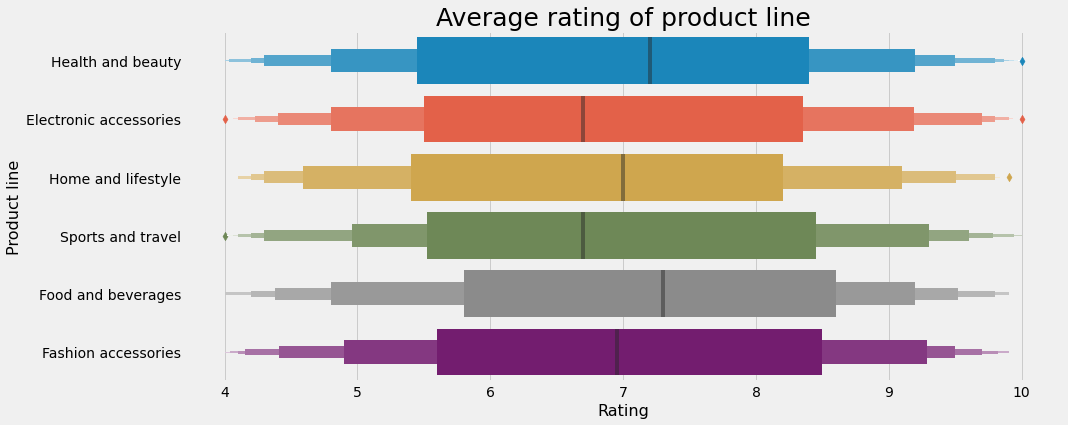

In [23]:
plt.figure(figsize = (14,6))
ax = sns.boxenplot(y = "Product line", x = "Rating", data = data)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

<h3>Product sales on the basis of gender</h3>

Text(0, 0.5, 'Product Line')

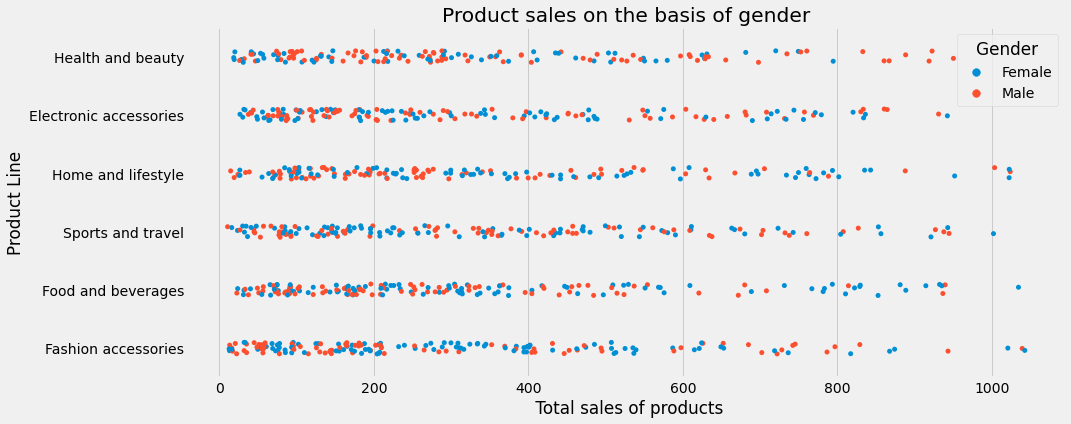

In [24]:
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = data)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

<h3>Product and gross income</h3> 

<Figure size 1008x432 with 0 Axes>

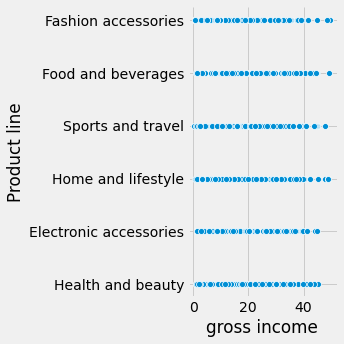

In [25]:
plt.figure(figsize = (14,6))
ax = sns.relplot(y= "Product line", x = "gross income", data = data)
# ax.set_title(label = "Products and Gross income")
# ax.set_xlabel(xlabel = "Total gross income")
# ax.set_ylabel(ylabel = "Product line")

<h3> Here we can see the gross income of different product line </h3> 